In [1]:
import pandas as pd

In [2]:
from itertools import product

In [3]:
p = '/home/jovyan/brain-age-benchmark-paper/results/'
proc = 'autoreject'

In [4]:
dfs = []
datasets = ['tuab', 'chbp', 'lemon', 'camcan']
benchmarks = ['dummy', 'handcrafted', 'filterbank-riemann', 'filterbank-source', 'shallow', 'deep', 'tcn']
for d, m in product(sorted(datasets), benchmarks):
    try:
        df = pd.read_csv(
            p+f'benchmark-{m}_dataset-{d}_processing-{proc}.csv',
            index_col=0,
        )
        df['processing'] = proc
        dfs.append(df)
    except:
        continue

dfs = pd.concat(dfs)

In [5]:
dfs.replace(
    {
        'camcan': 'Cam-CAN',
        'deep': 'Deep',
        'dummy': 'Dummy',
        'handcrafted': 'Handcrafted',
        'tuab': 'TUAB',
        'dataset': 'Dataset',
        'autoreject': 'Autoreject',
        'lemon': 'LEMON',
        'chbp': 'CHBP',
        'filterbank-riemann': 'Filterbank-Riemann',
        'filterbank-source': 'Filterbank-Source',
        'tcn': 'TCN',
        'shallow': 'Shallow',
        'deep': 'Deep',
    },
    inplace=True,
)

In [6]:
dfs.rename(
    columns={
        'dataset': 'Dataset',
        'r2': 'R2',
        'benchmark': 'Benchmark',
        'processing': 'Processing',
    },
    inplace=True,
)

In [7]:
dfs.Benchmark.unique()

array(['Dummy', 'Handcrafted', 'Filterbank-Riemann', 'Shallow', 'Deep',
       'TCN', 'Filterbank-Source'], dtype=object)

In [8]:
dfs = dfs.groupby(['Processing', 'Dataset', 'Benchmark'], as_index=False).mean()

In [11]:
import seaborn as sns
sns.set(color_codes=True)

In [12]:
import matplotlib.pyplot as plt

In [13]:
metrics = ['MAE']#, 'R2']

In [14]:
import numpy as np

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

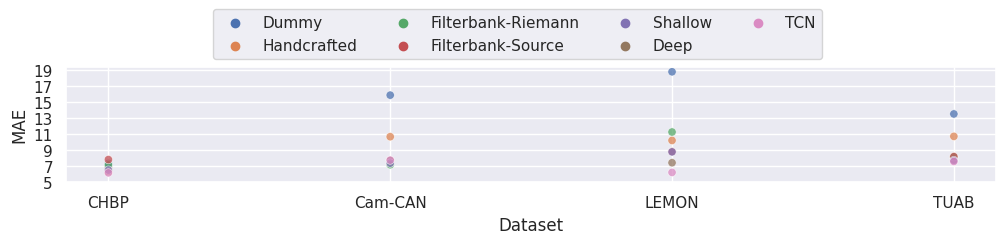

In [15]:
for m in metrics:
    fig, ax = plt.subplots(1, 1, figsize=(12,1.5))
    ax = sns.scatterplot(
        data=dfs, x='Dataset', y=m, hue='Benchmark', ax=ax, alpha=.75,
        hue_order=['Dummy', 'Handcrafted', 'Filterbank-Riemann', 'Filterbank-Source', 'Shallow', 'Deep', 'TCN', ],
    )
    ax.legend(ncol=4, bbox_to_anchor=[0.15, 1, 1, .4])
    if m == 'MAE':
        yticks = list(range(5, 21, 2))
        ax.set_yticks(yticks);
    else:
        yticks = np.linspace(-.25, 1, 6)
        ax.set_yticks(yticks)
        ax.set_ylim([-.25, 1])

In [16]:
# zoom CHBP
axins1 = ax.inset_axes([0.1, 0.1, 0.05, 0.7])
axins1 = sns.scatterplot(
    data=dfs[dfs.Dataset=='CHBP'], x='Dataset', y=m, hue='Benchmark', ax=axins1, alpha=.75,
    hue_order=['Dummy', 'Handcrafted', 'Filterbank-Riemann', 'Filterbank-Source', 'Shallow', 'Deep', 'TCN', ],
)
#axins.set_xlim([-.5, .5])
axins1.set_ylabel('')
axins1.set_yticks(yticks)
axins1.set_ylim(6,8)
axins1.set_yticklabels([])
axins1.set_xlabel('')
axins1.set_xticklabels([])
axins1.legend([], [], frameon=False)
ax.indicate_inset_zoom(axins1, edgecolor="black");

# zoom Cam-CAN
axins2 = ax.inset_axes([.4, 0.1, 0.05, 0.7])
axins2 = sns.scatterplot(
    data=dfs[dfs.Dataset=='Cam-CAN'], x='Dataset', y=m, hue='Benchmark', ax=axins2, alpha=.75,
    hue_order=['Dummy', 'Handcrafted', 'Filterbank-Riemann', 'Filterbank-Source', 'Shallow', 'Deep', 'TCN', ],
)
#axins.set_xlim([0.5, 1.5])
axins2.set_ylabel('')
axins2.set_yticks(yticks)
axins2.set_ylim(7,8)
axins2.set_yticklabels([])
axins2.set_xlabel('')
axins2.set_xticklabels([])
axins2.legend([], [], frameon=False)
ax.indicate_inset_zoom(axins2, edgecolor="black");

# zoom TUAB
axins3 = ax.inset_axes([.85, 0.1, 0.05, 0.7])
axins3 = sns.scatterplot(
    data=dfs[dfs.Dataset=='TUAB'], x='Dataset', y=m, hue='Benchmark', ax=axins3, alpha=.75,
    hue_order=['Dummy', 'Handcrafted', 'Filterbank-Riemann', 'Filterbank-Source', 'Shallow', 'Deep', 'TCN', ],
)
#axins.set_xlim([2.5, 3.5])
axins3.set_ylabel('')
axins3.set_yticks(yticks)
axins3.set_ylim(7.5,8.3)
axins3.set_yticklabels([])
axins3.set_xlabel('')
axins3.set_xticklabels([])
axins3.legend([], [], frameon=False)
ax.indicate_inset_zoom(axins3, edgecolor="black");


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

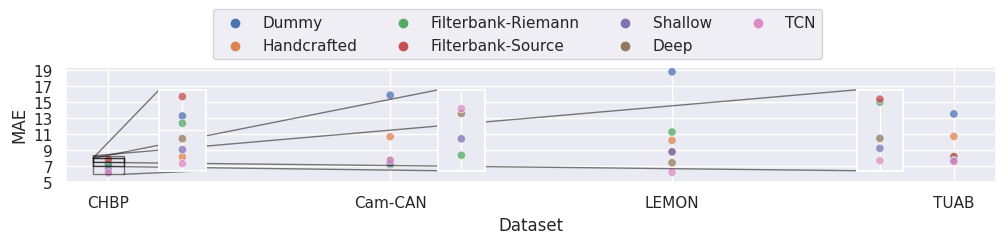

In [17]:
ax.get_figure()

In [30]:
zoomins = False
sharey = True

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

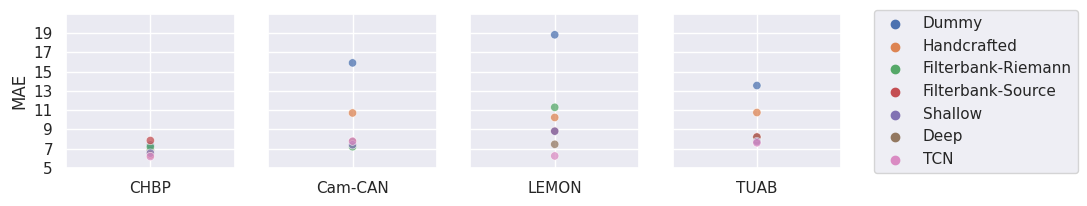

In [31]:
datasets = dfs.Dataset.unique()
for m in metrics:
    fig, ax_arr = plt.subplots(1, len(datasets), figsize=(10,2), sharey=sharey)
    for ds_i, ds in enumerate(datasets):
        ax = ax_arr[ds_i]
        ax = sns.scatterplot(
            data=dfs[dfs.Dataset==ds], x='Dataset', y=m, hue='Benchmark', ax=ax, alpha=.75,
            hue_order=['Dummy', 'Handcrafted', 'Filterbank-Riemann', 'Filterbank-Source', 'Shallow', 'Deep', 'TCN', ],
        )
        
        if zoomins and ds not in ['LEMON']:
            axins = ax.inset_axes([0.6, 0.1, 0.15, 0.7])
            axins.set_ylabel('')
            #axins.set_yticks(yticks)
            axins.set_ylim(7.5,8.3)
            axins.set_yticklabels([])
            axins.set_xlabel('')
            axins.set_xticklabels([])
            axins.legend([], [], frameon=False)
            #ax.indicate_inset_zoom(axins, edgecolor="black");


        ax.legend([], [], frameon=False)
        ax.set_xlabel('')
        if ds_i != 0:
            ax.set_ylabel('')
        else:
            ax.set_yticks(list(range(5, 21, 2)))
            ax.set_ylim(5, 21)
    ax.legend(ncol=1, bbox_to_anchor=[1.45, 1, 1, 0.075])
